# FISH Barcoding Method Comparison Script for Thesis
author: Camillo Moschner | date: 09.01.2023

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from ipywidgets import interact
import seaborn as sns
import math
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

## Function Definitions

In [2]:
# ----------------- search for N -----------------
def sequenctial_FISH_N(C, R):
    N = C * R
    return N

def factorial_FISH_UFSone_N(C, R):
    N = C ** R
    return N

def factorial_FISH_binary_UFSequalsC_N(X):
    N = 2 ** X
    return N

def powerset_factorial_FISH_UFSone_N(C, X):
    N = (2 ** C) ** X # seems to capture len( sum(combination lists) )
    return N
# ----------------- search for R -----------------
def sequenctial_FISH_R(C, N):
    R = N / C
    return R

def factorial_FISH_UFSone_R(C, N):
    R = np.log10(N)/np.log10(C)
    return R

def factorial_FISH_binary_UFSequalsC_R(C, X):
    N = 2 ** X
    R = len( bin(N -1)[2:] ) / C
    return R

def powerset_factorial_FISH_UFSone_R(X):
    R = X
    return R
# ----------------- search for X -----------------
def factorial_FISH_UFSone_X(C, R):
    N = C ** R
    return R



# powerset function ------------------------------
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [3]:
C = 4
R = 5
C ** R #/4

1024

In [4]:
len(list(product( *[ ['B', 'G', 'O', 'R']] * 5 )))

1024

## Define Parameters
  * N ... number of samples
  * C ... number of colours / channels / fluorophores
  * R ... number of FISH rounds -> indicator of microscope time needed + (potentially) signal removal steps needed
  * X ... number of unique probe binding sites, i.e. readout probes, total -> indicator of cloning complexity & cost => each bit requires purchasing of one new readout probe

## Testing for max samples N

In [5]:
C_list = range(1,6)
R_list = range(0,123)

results_list_sequential_FISH_N = []
results_list_factorial_FISH_UFSone_N = []
results_list_factorial_FISH_binary_UFSequalsC = []
results_list_powerset_factorial_FISH_UFSone = []

for C in C_list:
    for R in R_list:
        results_list_sequential_FISH_N.append(
            {
                "method": 'sequential',
                "C": C,
                "R": R,
                'R_rounded': math.ceil(R),
                "N": sequenctial_FISH_N(C, R),
                "X": sequenctial_FISH_N(C, R) # X == N -> every sample requires unique/new readout probe!
            }
        )
        results_list_factorial_FISH_UFSone_N.append(
            {
                "method": 'factorial_UFSone',
                "C": C,
                "R": R,
                'R_rounded': math.ceil(R),
                "N": factorial_FISH_UFSone_N(C, R),
                "X": R * C
            }
        )
        results_list_powerset_factorial_FISH_UFSone.append(
        {
            "method": 'powerset_factorial_FISH',
            "C": C,
            "R": R,
            'R_rounded': R,
            "N": powerset_factorial_FISH_UFSone_N(C,R),
            "X": R * C
        }
        )
    for X in range(0,30):
        results_list_factorial_FISH_binary_UFSequalsC.append(
            {
                "method": 'factorial_FISH_binary',
                "C": C,
                "R": factorial_FISH_binary_UFSequalsC_R(C, X),
                'R_rounded': math.ceil(factorial_FISH_binary_UFSequalsC_R(C, X)),
                "N": factorial_FISH_binary_UFSequalsC_N(X),
                "X": X
            }
        )    
results_df_sequential_FISH_N = pd.DataFrame(results_list_sequential_FISH_N)
results_df_factorial_FISH_UFSone_N = pd.DataFrame(results_list_factorial_FISH_UFSone_N)
results_df_factorial_FISH_binary_UFSequalsC = pd.DataFrame(results_list_factorial_FISH_binary_UFSequalsC)
results_df_powerset_factorial_FISH_UFSone = pd.DataFrame(results_list_powerset_factorial_FISH_UFSone)

In [6]:
full_results_df = pd.concat([results_df_sequential_FISH_N, 
                             results_df_factorial_FISH_UFSone_N, 
                             results_df_factorial_FISH_binary_UFSequalsC,
                             results_df_powerset_factorial_FISH_UFSone]
                           )

In [7]:
results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==3) & (results_df_factorial_FISH_UFSone_N.N < 1_000_500)]

,method,C,R,R_rounded,N,X
246,factorial_UFSone,3,0,0,1,0
247,factorial_UFSone,3,1,1,3,3
248,factorial_UFSone,3,2,2,9,6
249,factorial_UFSone,3,3,3,27,9
250,factorial_UFSone,3,4,4,81,12
251,factorial_UFSone,3,5,5,243,15
252,factorial_UFSone,3,6,6,729,18
253,factorial_UFSone,3,7,7,2187,21
254,factorial_UFSone,3,8,8,6561,24
255,factorial_UFSone,3,9,9,19683,27


In [8]:
R_lim = 14.5
column0xlim = R_lim
column1xlim = 41.5


### Plot until/incl. C=5

/Users/camillomoschner/opt/anaconda3/envs/napari/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


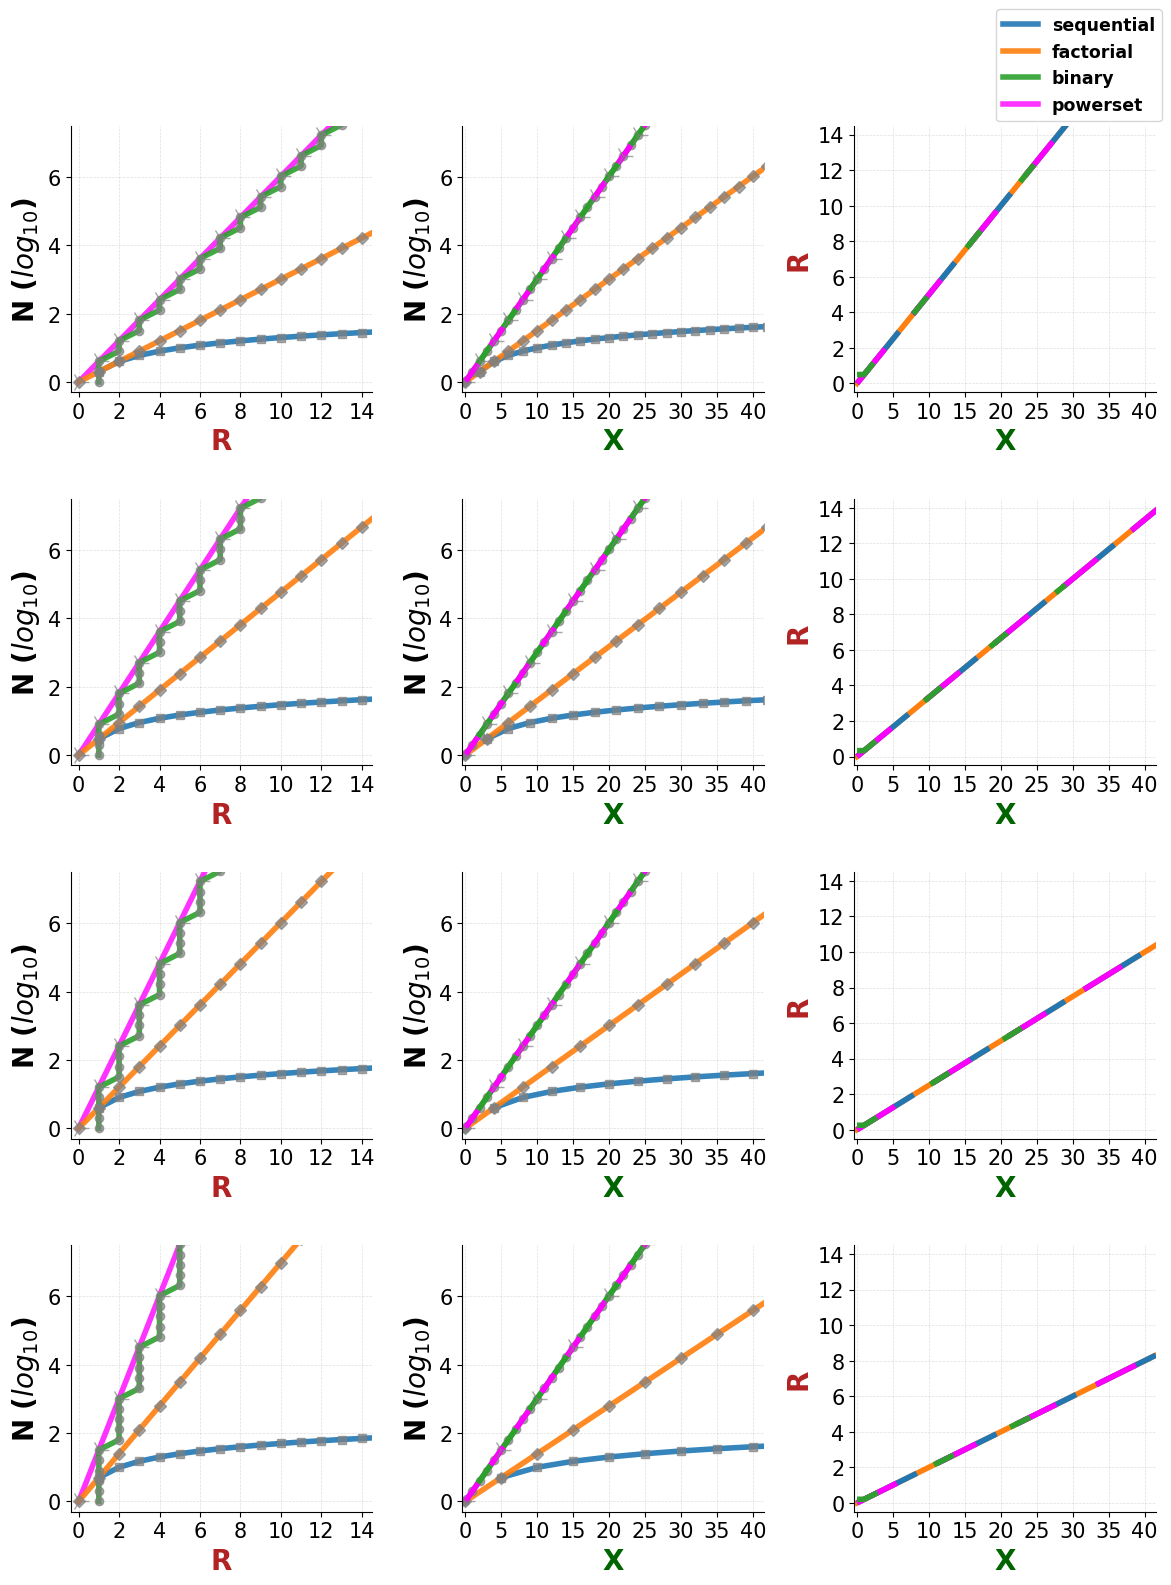

In [9]:
fig = plt.figure(figsize=(14,18))
gs = gridspec.GridSpec(4, 3,figure=fig, hspace=0.4,wspace=0.3)
#plt.suptitle(f"FISH Barcoding Methods | C: 2-{list(C_list)[-1]} | R: {list(R_list)[0]}-{list(R_list)[-1]}", fontsize=20)
cmap_segmentation_no = 4
blue_cmap = sns.color_palette("Blues",cmap_segmentation_no)
purple_cmap = sns.color_palette("Purples",cmap_segmentation_no)
orange_cmap = sns.color_palette("Oranges",cmap_segmentation_no)

ax1 = fig.add_subplot(gs[0,0])
C_test = 2
# ax1.set_title(f"C = {C_test}" , fontsize=20)
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
powerset_test_df = results_df_powerset_factorial_FISH_UFSone.loc[(results_df_powerset_factorial_FISH_UFSone.C==C_test)]
ax1.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)), color='magenta', label=f'powerset', linewidth=4, alpha=0.8)
ax1.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax1.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N), label=f'sequential', linewidth=4, alpha=0.9)
ax1.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)), label=f'factorial', linewidth=4, alpha=0.9)
ax1.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N), label=f'binary', linewidth=4, alpha=0.9)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,2,3,0]
ax1.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax1.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax1.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax1.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
ax1.set_ylim(-0.3,7.5)
ax1.set_xticks(np.arange(0, R_lim, 2))
ax1.set_xlim(-0.4, R_lim)

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)


ax2 = fig.add_subplot(gs[0,1])
ax2.plot(sequ_test_df.X, np.log10(sequ_test_df.N), label='sequential', linewidth=4, alpha=0.9)#, color='navy')
ax2.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)), label='factorial', linewidth=4, linestyle='-', alpha=0.9)#, color='orange')
ax2.plot(binary_test_df.X, np.log10(binary_test_df.N), label='binary', linewidth=4, linestyle='-', alpha=0.9)#, color='green')
ax2.plot(sequ_test_df.X, np.log10(sequ_test_df.N),"s", linewidth=3, alpha=0.7, color='grey')
ax2.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)),"D", linewidth=3, alpha=0.7, color='grey')
ax2.plot(binary_test_df.X, np.log10(binary_test_df.N),'o', linewidth=3, alpha=0.7, color='grey')

line1, = ax2.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)), label=f'powerset',color='magenta',linewidth=4,gapcolor='tab:green', alpha=0.99)
line1.set_dashes([4, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
ax2.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax2.set_ylim(-0.3,7.5)
ax2.set_xlim(-0.4, column1xlim)
ax2.set_xticks(np.arange(0, column1xlim+2, 5))
ax2.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(fact_test_df.X, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,  alpha=0.99)
line1, = ax3.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,alpha=0.99) #gapcolor='tab:green', 
line1.set_dashes([12, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
line2, = ax3.plot(powerset_test_df.X, powerset_test_df.R, label=f'powerset',color='magenta', linewidth=4, dashes=[4, 10],  alpha=0.99)
line2.set_dashes([8, 8]) 
line3, = ax3.plot(binary_test_df.X, binary_test_df.R, label=f'powerset',color='tab:green', linewidth=4, dashes=[4, 10],  alpha=0.99)
line3.set_dashes([4, 11.3]) 

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)
ax3.set_ylabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax3.set_ylim(-0.5,R_lim)
ax3.set_xlim(-0.4, column1xlim)
ax3.set_xticks(np.arange(0, column1xlim+2, 5))
ax3.set_yticks(np.arange(0, R_lim, 2))
"""-------------------------------------------------------------------------------------------------------------------------
"""
ax4 = fig.add_subplot(gs[1,0])
C_test = 3
# ax4.set_title(f"C = {C_test}" , fontsize=20)
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
powerset_test_df = results_df_powerset_factorial_FISH_UFSone.loc[(results_df_powerset_factorial_FISH_UFSone.C==C_test)]
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)), color='magenta', label=f'powerset', linewidth=4, alpha=0.8)
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N), label=f'sequential', linewidth=4, alpha=0.9)
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)), label=f'factorial', linewidth=4, alpha=0.9)
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N), label=f'binary', linewidth=4, alpha=0.9)
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_xlabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax4.set_xticks(np.arange(0, R_lim, 2))
ax4.set_xlim(-0.4,R_lim)
ax4.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')

ax4.set_ylim(-0.3,7.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)


ax5 = fig.add_subplot(gs[1,1])
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N), label='sequential', linewidth=4, alpha=0.9)#, color='navy')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)), label='factorial', linewidth=4, alpha=0.9)#, color='orange')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N), label='binary', linewidth=4, alpha=0.9)#, color='green')
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')
line1, = ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)), label=f'powerset',color='magenta',linewidth=4,gapcolor='tab:green', alpha=0.99)
line1.set_dashes([4, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.tick_params(axis='both', which='major', labelsize=15)
ax5.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
#ax4.set_ylabel('N', fontsize=20)
ax5.set_ylim(-0.3,7.5)
ax5.set_xlim(-0.4, column1xlim)
ax5.set_xticks(np.arange(0, column1xlim+2, 5))
#ax4.legend(prop={'size': 12.5,'weight':'bold'})
ax5.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)

ax6 = fig.add_subplot(gs[1,2])
# ax6.plot(fact_test_df.X*correction_factor, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,  alpha=0.99)
# line1, = ax6.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,alpha=0.99) #gapcolor='tab:green', 
# line1.set_dashes([12, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
# # line2, = 
# ax6.plot(powerset_test_df.X, powerset_test_df.R, label=f'powerset',color='magenta', linewidth=4,  alpha=0.99)
# # line2.set_dashes([8, 8]) 
# # line3, = ax6.plot(binary_test_df.X, binary_test_df.R, label=f'powerset',color='tab:green', linewidth=4, dashes=[4, 10],  alpha=0.99)
# # line3.set_dashes([4, 11.3]) 
# line1, = ax6.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,gapcolor='tab:green', alpha=0.99)
# line1.set_dashes([0, 4, 4, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
# ax6.plot(fact_test_df.X*correction_factor, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,dashes=[4, 8],  alpha=0.99)
ax6.plot(fact_test_df.X, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,  alpha=0.99)
line1, = ax6.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,alpha=0.99) #gapcolor='tab:green', 
line1.set_dashes([12, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
line2, = ax6.plot(powerset_test_df.X, powerset_test_df.R, label=f'powerset',color='magenta', linewidth=4, dashes=[4, 10],  alpha=0.99)
line2.set_dashes([8, 8]) 
line3, = ax6.plot(binary_test_df.X, binary_test_df.R, label=f'powerset',color='tab:green', linewidth=4, dashes=[4, 10],  alpha=0.99)
line3.set_dashes([4, 11.3]) 

ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.tick_params(axis='both', which='major', labelsize=15)
ax6.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax6.set_ylabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax6.set_yticks(np.arange(0, R_lim, 2))
#ax2.legend(prop={'size': 12.5,'weight':'bold'})
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)
ax6.set_ylim(-0.5,R_lim)
ax6.set_xlim(-0.4, column1xlim)
ax6.set_xticks(np.arange(0, column1xlim+2, 5))
"""-------------------------------------------------------------------------------------------------------------------------
"""
ax4 = fig.add_subplot(gs[2,0])
C_test = 4
# ax4.set_title(f"C = {C_test}" , fontsize=20)
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
powerset_test_df = results_df_powerset_factorial_FISH_UFSone.loc[(results_df_powerset_factorial_FISH_UFSone.C==C_test)]
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)), color='magenta', label=f'powerset', linewidth=4, alpha=0.8)
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N), label=f'sequential', linewidth=4, alpha=0.9)
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)), label=f'factorial', linewidth=4, alpha=0.9)
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N), label=f'binary', linewidth=4, alpha=0.9)
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_xlabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax4.set_xticks(np.arange(0, R_lim, 2))
ax4.set_xlim(-0.4, R_lim)
ax4.set_ylim(-0.3,7.5)
ax4.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
#ax4.set_yticks(np.arange(0,7.5,2)+[np.log10(40)])


# ax4.set_ylim(-1000,150_000)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)
ax5 = fig.add_subplot(gs[2,1])
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N), label='sequential', linewidth=4, alpha=0.9)#, color='navy')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)), label='factorial', linewidth=4, alpha=0.9)#, color='orange')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N), label='binary', linewidth=4, alpha=0.9)#, color='green')
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')
line1, = ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)), label=f'powerset',color='magenta',linewidth=4,gapcolor='tab:green', alpha=0.99)
line1.set_dashes([4, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.tick_params(axis='both', which='major', labelsize=15)
ax5.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax5.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
ax5.set_ylim(-0.3,7.5)
ax5.set_xlim(-0.4, column1xlim)
ax5.set_xticks(np.arange(0, column1xlim+2, 5))
#ax4.legend(prop={'size': 12.5,'weight':'bold'})
# ax5.set_yticks(np.arange(0, 175_000, 25_000))
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)

ax6 = fig.add_subplot(gs[2,2])
ax6.plot(fact_test_df.X, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,  alpha=0.99)
line1, = ax6.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,alpha=0.99) #gapcolor='tab:green', 
line1.set_dashes([12, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
line2, = ax6.plot(powerset_test_df.X, powerset_test_df.R, label=f'powerset',color='magenta', linewidth=4, dashes=[4, 10],  alpha=0.99)
line2.set_dashes([8, 8]) 
line3, = ax6.plot(binary_test_df.X, binary_test_df.R, label=f'powerset',color='tab:green', linewidth=4, dashes=[4, 10],  alpha=0.99)
line3.set_dashes([4, 11.3]) 

ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.tick_params(axis='both', which='major', labelsize=15)
ax6.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax6.set_ylabel('R', fontsize=20, color='firebrick',fontweight='bold')

ax6.set_ylim(-0.5,R_lim)
ax6.set_yticks(np.arange(0, R_lim, 2))
ax6.set_xlim(-0.4, column1xlim)
ax6.set_xticks(np.arange(0, column1xlim+2, 5))
#ax2.legend(prop={'size': 12.5,'weight':'bold'})
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)



"""-------------------------------------------------------------------------------------------------------------------------
"""
ax4 = fig.add_subplot(gs[3,0])
C_test = 5
# ax4.set_title(f"C = {C_test}" , fontsize=20)
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
powerset_test_df = results_df_powerset_factorial_FISH_UFSone.loc[(results_df_powerset_factorial_FISH_UFSone.C==C_test)]
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)), color='magenta', label=f'powerset', linewidth=4, alpha=0.8)
ax4.plot(powerset_test_df.R_rounded, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N), label=f'sequential', linewidth=4, alpha=0.9)
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)), label=f'factorial', linewidth=4, alpha=0.9)
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N), label=f'binary', linewidth=4, alpha=0.9)
ax4.plot(sequ_test_df.R_rounded, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax4.plot(fact_test_df.R_rounded, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax4.plot(binary_test_df.R_rounded, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_xlabel('R', fontsize=20, color='firebrick', fontweight='bold')
ax4.set_xticks(np.arange(0, R_lim, 2))
ax4.set_xlim(-0.4, R_lim)
ax4.set_ylim(-0.3,7.5)
ax4.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)


ax5 = fig.add_subplot(gs[3,1])
sequ_test_df = results_df_sequential_FISH_N.loc[(results_df_sequential_FISH_N.C==C_test)]
fact_test_df = results_df_factorial_FISH_UFSone_N.loc[(results_df_factorial_FISH_UFSone_N.C==C_test)]
binary_test_df = results_df_factorial_FISH_binary_UFSequalsC.loc[(results_df_factorial_FISH_binary_UFSequalsC.C==C_test)]
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N), label='sequential', linewidth=4, alpha=0.9)#, color='navy')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)), label='factorial', linewidth=4, alpha=0.9)#, color='orange')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N), label='binary', linewidth=4, alpha=0.9)#, color='green')
ax5.plot(sequ_test_df.X, np.log10(sequ_test_df.N),"s", linewidth=4, alpha=0.7, color='grey')
ax5.plot(fact_test_df.X, np.log10(fact_test_df.N.astype(float)),"D", linewidth=4, alpha=0.7, color='grey')
ax5.plot(binary_test_df.X, np.log10(binary_test_df.N),'o', linewidth=4, alpha=0.7, color='grey')
line1, = ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)), label=f'powerset',color='magenta',linewidth=4,gapcolor='tab:green', alpha=0.99)
line1.set_dashes([4, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
ax5.plot(powerset_test_df.X, np.log10(powerset_test_df.N.astype(float)),'4',markersize=15, linewidth=4, alpha=0.7, color='grey')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.tick_params(axis='both', which='major', labelsize=15)
ax5.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax5.set_ylabel('N ($log_{10}$)', fontsize=20, color='black',fontweight='bold')
ax5.set_ylim(-0.3,7.5)
ax5.set_xlim(-0.4, column1xlim)
ax5.set_xticks(np.arange(0, column1xlim+2, 5))
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)


ax6 = fig.add_subplot(gs[3,2])
ax6.plot(fact_test_df.X, fact_test_df.R, label='factorial',color='tab:orange', linewidth=4,  alpha=0.99)
line1, = ax6.plot(sequ_test_df.X, sequ_test_df.R, label='sequential', color='tab:blue',linewidth=4,alpha=0.99) #gapcolor='tab:green', 
line1.set_dashes([12, 4])  # 2pt line, 2pt break, 10pt line, 2pt break.
line2, = ax6.plot(powerset_test_df.X, powerset_test_df.R, label=f'powerset',color='magenta', linewidth=4, dashes=[4, 10],  alpha=0.99)
line2.set_dashes([8, 8]) 
line3, = ax6.plot(binary_test_df.X, binary_test_df.R, label=f'powerset',color='tab:green', linewidth=4, dashes=[4, 10],  alpha=0.99)
line3.set_dashes([4, 11.3]) 

ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.tick_params(axis='both', which='major', labelsize=15)
ax6.set_xlabel('X', fontsize=20, color='darkgreen',fontweight='bold')
ax6.set_ylabel('R', fontsize=20, color='firebrick',fontweight='bold')
ax6.set_ylim(-0.5,R_lim)
ax6.set_yticks(np.arange(0, R_lim, 2))
ax6.set_xlim(-0.4, column1xlim)
ax6.set_xticks(np.arange(0, column1xlim+2, 5))


plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.25)
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(3.65,1.47), loc="upper right",prop={'size': 12.5,'weight':'bold'})
plt.savefig(f"FISH_barcoding_methods_sims2.png", dpi=300, bbox_inches='tight')
plt.show(); 

In [10]:
test_fact_C4 = full_results_df.loc[(full_results_df.C==4) & (full_results_df.N < 1_100_000)  & (full_results_df.method == 'factorial_FISH_binary')]
test_fact_C4

,method,C,R,R_rounded,N,X
90,factorial_FISH_binary,4,0.25,1,1,0
91,factorial_FISH_binary,4,0.25,1,2,1
92,factorial_FISH_binary,4,0.50,1,4,2
93,factorial_FISH_binary,4,0.75,1,8,3
94,factorial_FISH_binary,4,1.00,1,16,4
95,factorial_FISH_binary,4,1.25,2,32,5
96,factorial_FISH_binary,4,1.50,2,64,6
97,factorial_FISH_binary,4,1.75,2,128,7
98,factorial_FISH_binary,4,2.00,2,256,8
99,factorial_FISH_binary,4,2.25,3,512,9


In [11]:
full_results_df.method.unique()

array(['sequential', 'factorial_UFSone', 'factorial_FISH_binary',
       'powerset_factorial_FISH'], dtype=object)